In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from joblib import dump, load
import statistics as st
import json
from calendar import isleap

In [5]:
# OBS CNN
CNN = load('../../March2021/Observation_models/CNNY.joblib')
CNN.values=CNN.where(CNN>=0.46,0)
CNN.values=CNN.where(CNN==0.0,1)
cnnObs=CNN.sel(time=slice('1981-1-01','2014-12-31'))
cnnObs.time

<xarray.DataArray 'time' (time: 2108)>
array(['1981-01-01T00:00:00.000000000', '1981-01-02T00:00:00.000000000',
       '1981-01-03T00:00:00.000000000', ..., '2014-12-29T00:00:00.000000000',
       '2014-12-30T00:00:00.000000000', '2014-12-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2014-12-31

In [6]:
#Historica/ref best5 ensemble mean and std

ACCESS_CM2_CNN = load('../../March2021/Model_plots/ACCESS-CM2-CNN-Y.joblib').sel(time=slice('1981-1-01','2014-12-31'))
IITMESM_CNN = load('../../March2021/Model_plots/IITM-ESM-CNN-Y.joblib').sel(time=slice('1981-1-01','2014-12-31'))
IPSL_CM6A_LR_CNN = load('../../March2021/Model_plots/IPSL-CM6A-LR-CNN-Y.joblib').sel(time=slice('1981-1-01','2014-12-31'))
MPI_ESM1_2_LR_CNN = load('../../March2021/Model_plots/MPI-ESM1-2-LR-CNN-Y.joblib').sel(time=slice('1981-1-01','2014-12-31'))
EC_Earth3_CNN = load('../../March2021/Model_plots/EC-Earth3-CNN-Y.joblib').sel(time=slice('1981-1-01','2014-12-31'))

ACCESS_CM2_CNN.values=ACCESS_CM2_CNN.where(ACCESS_CM2_CNN>=0.46,0)
IITMESM_CNN.values=IITMESM_CNN.where(IITMESM_CNN>=0.46,0)
IPSL_CM6A_LR_CNN.values=IPSL_CM6A_LR_CNN.where(IPSL_CM6A_LR_CNN>=0.46,0)
MPI_ESM1_2_LR_CNN.values=MPI_ESM1_2_LR_CNN.where(MPI_ESM1_2_LR_CNN>=0.46,0)
EC_Earth3_CNN.values=EC_Earth3_CNN.where(EC_Earth3_CNN>=0.46,0)

ACCESS_CM2_CNN.values=ACCESS_CM2_CNN.where(ACCESS_CM2_CNN==0.0,1)
IITMESM_CNN.values=IITMESM_CNN.where(IITMESM_CNN==0.0,1)
IPSL_CM6A_LR_CNN.values=IPSL_CM6A_LR_CNN.where(IPSL_CM6A_LR_CNN==0.0,1)
MPI_ESM1_2_LR_CNN.values=MPI_ESM1_2_LR_CNN.where(MPI_ESM1_2_LR_CNN==0.0,1)
EC_Earth3_CNN.values=EC_Earth3_CNN.where(EC_Earth3_CNN==0.0,1)



fList=(ACCESS_CM2_CNN,IITMESM_CNN,
       IPSL_CM6A_LR_CNN, MPI_ESM1_2_LR_CNN, 
       EC_Earth3_CNN)
MTs=[]
for fL in fList:
    ts1=fL.sel(time=slice('1981-1-01','2014-12-31'))
    MTs.append(ts1)
    
    
MS=np.array(MTs)
meanMS=np.mean(MS, axis=0)
#print(meanMS)

ensTs=cnnObs.copy()
ensTs.values=meanMS
#ensTs
ensTsMean=ensTs.groupby('time.dayofyear').mean()
ensTsStd=ensTs.groupby('time.dayofyear').std()


print(cnnObs)
print(ensTs)


<xarray.DataArray 'yLR' (time: 2108)>
array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2014-12-31
<xarray.DataArray 'yLR' (time: 2108)>
array([0.2, 0.2, 0.2, ..., 0.4, 0.4, 0.4], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2014-12-31


/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(


<xarray.DataArray (time: 2108)>
array([-1.59211703e-08,  3.52168320e-08,  2.31843897e-09, ...,
        9.99999934e-01,  9.99999955e-01,  1.00000005e+00])
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01T12:00:00 ... 2014-12-31T12:00:00
<xarray.DataArray 'yLR' (time: 2108)>
array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2014-12-31


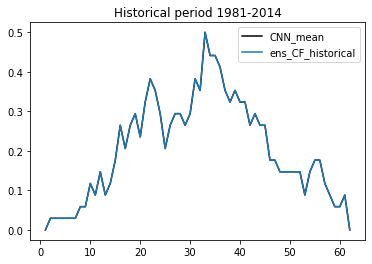

In [7]:
#Historical Change factor
x=np.arange(1,63)
cnnObsMean1=cnnObs.groupby('time.dayofyear').mean()
cnnObsMean2=cnnObsMean1.roll(dayofyear=31)
cnn=cnnObsMean2[(cnnObsMean2.dayofyear<366) | (cnnObsMean2.dayofyear>366)]
plt.plot(x,cnn,label='CNN_mean', color='black')

ACCESS_CM2_CNN = load('../../March2021/Model_plots/ACCESS-CM2-CNN-Y.joblib').sel(time=slice('1981-1-01','2014-12-31'))
IITMESM_CNN = load('../../March2021/Model_plots/IITM-ESM-CNN-Y.joblib').sel(time=slice('1981-1-01','2014-12-31'))
IPSL_CM6A_LR_CNN = load('../../March2021/Model_plots/IPSL-CM6A-LR-CNN-Y.joblib').sel(time=slice('1981-1-01','2014-12-31'))
MPI_ESM1_2_LR_CNN = load('../../March2021/Model_plots/MPI-ESM1-2-LR-CNN-Y.joblib').sel(time=slice('1981-1-01','2014-12-31'))
EC_Earth3_CNN = load('../../March2021/Model_plots/EC-Earth3-CNN-Y.joblib').sel(time=slice('1981-1-01','2014-12-31'))


ACCESS_CM2_CNN.values=ACCESS_CM2_CNN.where(ACCESS_CM2_CNN>=0.46,0)
IITMESM_CNN.values=IITMESM_CNN.where(IITMESM_CNN>=0.46,0)
IPSL_CM6A_LR_CNN.values=IPSL_CM6A_LR_CNN.where(IPSL_CM6A_LR_CNN>=0.46,0)
MPI_ESM1_2_LR_CNN.values=MPI_ESM1_2_LR_CNN.where(MPI_ESM1_2_LR_CNN>=0.46,0)
EC_Earth3_CNN.values=EC_Earth3_CNN.where(EC_Earth3_CNN>=0.46,0)

ACCESS_CM2_CNN.values=ACCESS_CM2_CNN.where(ACCESS_CM2_CNN==0.0,1)
IITMESM_CNN.values=IITMESM_CNN.where(IITMESM_CNN==0.0,1)
IPSL_CM6A_LR_CNN.values=IPSL_CM6A_LR_CNN.where(IPSL_CM6A_LR_CNN==0.0,1)
MPI_ESM1_2_LR_CNN.values=MPI_ESM1_2_LR_CNN.where(MPI_ESM1_2_LR_CNN==0.0,1)
EC_Earth3_CNN.values=EC_Earth3_CNN.where(EC_Earth3_CNN==0.0,1)



MTs=[]
for c,d in zip(ACCESS_CM2_CNN.time,range(ACCESS_CM2_CNN.time.shape[0])):
        
    MTs.append((ACCESS_CM2_CNN.sel(time=c)+IPSL_CM6A_LR_CNN.sel(time=c)+
                MPI_ESM1_2_LR_CNN.sel(time=c)+EC_Earth3_CNN.sel(time=c)+IITMESM_CNN.sel(time=c))/5.0)
    

#MS=np.array(MTs)
#meanMS=np.sum(MS, axis=0)/1922.0
#print(meanMS.shape)

ensFu=ACCESS_CM2_CNN.copy()
ensFu.values=MTs

ensFuMean=ensFu.groupby('time.dayofyear').mean()
ensFuStd=ensFu.groupby('time.dayofyear').std()

#print(ensFu)
#print(ACCESS_CM2_CNN)

### Change factor

BC=[]

for d in cnnObs.time:
    t=pd.Period(d.values, freq='H').dayofyear
    yr=d.dt.year.values
    if(isleap(yr) & t>334 ):
        t=t-1
    #print(t)
    BC.append(ensFuMean.sel(dayofyear=t).values+
                               (ensFuStd.sel(dayofyear=t).values/ensTsStd.sel(dayofyear=t).values)*
                               (cnnObs.sel(time=d,method="nearest").values-ensTsMean.sel(dayofyear=t).values))
    

ensFuBC = xr.DataArray( data=BC,dims=[ "time"], coords=dict(time=ensFu.time)) 
ensFuBCMean1=ensFuBC.groupby('time.dayofyear').mean()
ensFuBCMean2=ensFuBCMean1.roll(dayofyear=31)
ensFuBCMean=ensFuBCMean2[(ensFuBCMean2.dayofyear<366) | (ensFuBCMean2.dayofyear>366)]

plt.plot(x,ensFuBCMean,label='ens_CF_historical')
plt.title('Historical period 1981-2014')


plt.legend()
ensFuBCMean


print(ensFuBC)
print(cnnObs)    


In [9]:
## CF Future
ssps=['126','245','370','585']
#ssps=['370']

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

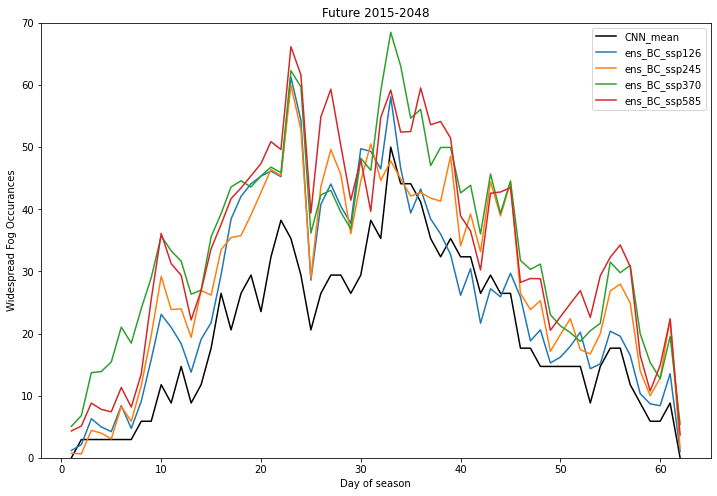

In [15]:
fig = plt.figure(figsize=(12,8))
x=np.arange(1,63)
cnnObsMean1=cnnObs.groupby('time.dayofyear').mean()
cnnObsMean2=cnnObsMean1.roll(dayofyear=31)
cnn=cnnObsMean2[(cnnObsMean2.dayofyear<366) | (cnnObsMean2.dayofyear>366)]
plt.plot(x,cnn*100.0,label='CNN_mean', color='black')


for sp in ssps :
    ACCESS_CM2_CNN = load('../../April2021/New_ssp'+sp+'/Modelplots_future/ACCESS-CM2_ssp'+sp+'.joblib').sel(time=slice('2015-1-01','2048-12-31'))
    IITMESM_CNN = load('../../April2021/New_ssp'+sp+'/Modelplots_future/IITM-ESM_ssp'+sp+'.joblib').sel(time=slice('2015-1-01','2048-12-31'))
    IPSL_CM6A_LR_CNN = load('../../April2021/New_ssp'+sp+'/Modelplots_future/IPSL-CM6A-LR_ssp'+sp+'.joblib').sel(time=slice('2015-1-01','2048-12-31'))
    MPI_ESM1_2_LR_CNN = load('../../April2021/New_ssp'+sp+'/Modelplots_future/MPI-ESM1-2-LR_ssp'+sp+'.joblib').sel(time=slice('2015-1-01','2048-12-31'))
    EC_Earth3_CNN = load('../../April2021/New_ssp'+sp+'/Modelplots_future/EC-Earth3_ssp'+sp+'.joblib').sel(time=slice('2015-1-01','2048-12-31'))
    
    ACCESS_CM2_CNN.values=ACCESS_CM2_CNN.where(ACCESS_CM2_CNN>=0.46,0)
    IITMESM_CNN.values=IITMESM_CNN.where(IITMESM_CNN>=0.46,0)
    IPSL_CM6A_LR_CNN.values=IPSL_CM6A_LR_CNN.where(IPSL_CM6A_LR_CNN>=0.46,0)
    MPI_ESM1_2_LR_CNN.values=MPI_ESM1_2_LR_CNN.where(MPI_ESM1_2_LR_CNN>=0.46,0)
    EC_Earth3_CNN.values=EC_Earth3_CNN.where(EC_Earth3_CNN>=0.46,0)

    ACCESS_CM2_CNN.values=ACCESS_CM2_CNN.where(ACCESS_CM2_CNN==0.0,1)
    IITMESM_CNN.values=IITMESM_CNN.where(IITMESM_CNN==0.0,1)
    IPSL_CM6A_LR_CNN.values=IPSL_CM6A_LR_CNN.where(IPSL_CM6A_LR_CNN==0.0,1)
    MPI_ESM1_2_LR_CNN.values=MPI_ESM1_2_LR_CNN.where(MPI_ESM1_2_LR_CNN==0.0,1)
    EC_Earth3_CNN.values=EC_Earth3_CNN.where(EC_Earth3_CNN==0.0,1)


    MTs=[]
    for c,d in zip(ACCESS_CM2_CNN.time,range(ACCESS_CM2_CNN.time.shape[0])):
        if(d == 0):
            MTs.append((ACCESS_CM2_CNN.sel(time=c)+IPSL_CM6A_LR_CNN.sel(time=c)+
                    MPI_ESM1_2_LR_CNN.sel(time=c)+EC_Earth3_CNN.sel(time=c))/4.0)
        else:
            MTs.append((ACCESS_CM2_CNN.sel(time=c)+IPSL_CM6A_LR_CNN.sel(time=c)+
                    MPI_ESM1_2_LR_CNN.sel(time=c)+EC_Earth3_CNN.sel(time=c)+IITMESM_CNN.sel(time=c))/5.0)
    

#MS=np.array(MTs)
#meanMS=np.sum(MS, axis=0)/1922.0
#print(meanMS.shape)

    ensFu=ACCESS_CM2_CNN.copy()
    ensFu.values=MTs
    #print(ensFu)
    #print(ACCESS_CM2_CNN)
    ensFuMean=ensFu.groupby('time.dayofyear').mean()
    ensFuStd=ensFu.groupby('time.dayofyear').std()
    
    ### Bias Correction

    BC=[]

    for d in cnnObs.time:
        t=pd.Period(d.values, freq='H').dayofyear
        yr=d.dt.year.values
        if(isleap(yr) & t>334 ):
            t=t-1
    #print(t)
        BC.append(ensFuMean.sel(dayofyear=t).values+
                               (ensFuStd.sel(dayofyear=t).values/ensTsStd.sel(dayofyear=t).values)*
                               (cnnObs.sel(time=d,method="nearest").values-ensTsMean.sel(dayofyear=t).values))
    #print(BC)
    ensFuBCF = xr.DataArray( data=BC,dims=[ "time"], coords=dict(time=ensFu.time))
    ensFuBCF 
    ensFuBCMean1=ensFuBCF.groupby('time.dayofyear').mean()
    ensFuBCMean2=ensFuBCMean1.roll(dayofyear=31)
    ensFuBCMean=ensFuBCMean2[(ensFuBCMean2.dayofyear<366) | (ensFuBCMean2.dayofyear>366)]

    plt.plot(x,ensFuBCMean*100.0,label='ens_BC_ssp'+sp)
    df=ensFuBCMean.to_dataframe(name='FF_BC')
    np.savetxt('WFD_CF_'+sp+'_2015-2048.txt', df.values*100.0, fmt='%1.3f')

plt.ylim([0, 70])
plt.ylabel('Widespread Fog Occurances')
plt.xlabel('Day of season')     
plt.title('Future 2015-2048')    
plt.legend()
plt.savefig('CF_WFD_2015-2048.eps')
plt.show()

#print(ensFuBCF)
#print(ensFuMean)
#print(ensTsMean)
    


/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

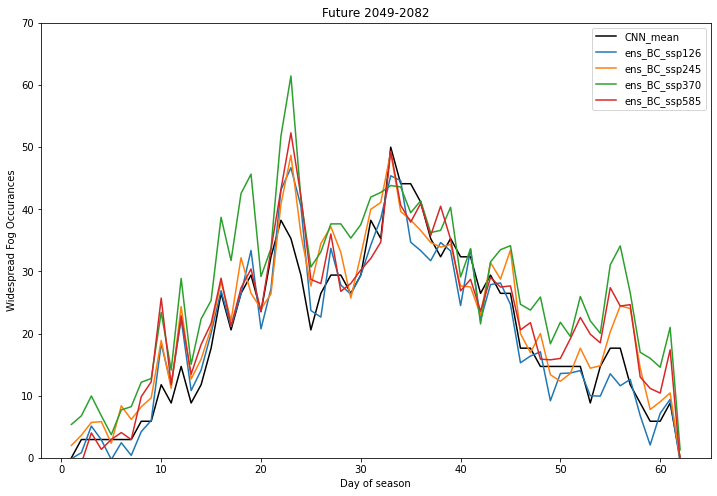

In [14]:
fig = plt.figure(figsize=(12,8))
x=np.arange(1,63)
cnnObsMean1=cnnObs.groupby('time.dayofyear').mean()
cnnObsMean2=cnnObsMean1.roll(dayofyear=31)
cnn=cnnObsMean2[(cnnObsMean2.dayofyear<366) | (cnnObsMean2.dayofyear>366)]
plt.plot(x,cnn*100.0,label='CNN_mean', color='black')


for sp in ssps :
    ACCESS_CM2_CNN = load('../../April2021/New_ssp'+sp+'/Modelplots_future/ACCESS-CM2_ssp'+sp+'.joblib').sel(time=slice('2049-1-01','2082-12-31'))
    IITMESM_CNN = load('../../April2021/New_ssp'+sp+'/Modelplots_future/IITM-ESM_ssp'+sp+'.joblib').sel(time=slice('2049-1-01','2082-12-31'))
    IPSL_CM6A_LR_CNN = load('../../April2021/New_ssp'+sp+'/Modelplots_future/IPSL-CM6A-LR_ssp'+sp+'.joblib').sel(time=slice('2049-1-01','2082-12-31'))
    MPI_ESM1_2_LR_CNN = load('../../April2021/New_ssp'+sp+'/Modelplots_future/MPI-ESM1-2-LR_ssp'+sp+'.joblib').sel(time=slice('2049-1-01','2082-12-31'))
    EC_Earth3_CNN = load('../../April2021/New_ssp'+sp+'/Modelplots_future/EC-Earth3_ssp'+sp+'.joblib').sel(time=slice('2049-1-01','2082-12-31'))
    ACCESS_CM2_CNN.values=ACCESS_CM2_CNN.where(ACCESS_CM2_CNN>=0.46,0)
    IITMESM_CNN.values=IITMESM_CNN.where(IITMESM_CNN>=0.46,0)
    IPSL_CM6A_LR_CNN.values=IPSL_CM6A_LR_CNN.where(IPSL_CM6A_LR_CNN>=0.46,0)
    MPI_ESM1_2_LR_CNN.values=MPI_ESM1_2_LR_CNN.where(MPI_ESM1_2_LR_CNN>=0.46,0)
    EC_Earth3_CNN.values=EC_Earth3_CNN.where(EC_Earth3_CNN>=0.46,0)

    ACCESS_CM2_CNN.values=ACCESS_CM2_CNN.where(ACCESS_CM2_CNN==0.0,1)
    IITMESM_CNN.values=IITMESM_CNN.where(IITMESM_CNN==0.0,1)
    IPSL_CM6A_LR_CNN.values=IPSL_CM6A_LR_CNN.where(IPSL_CM6A_LR_CNN==0.0,1)
    MPI_ESM1_2_LR_CNN.values=MPI_ESM1_2_LR_CNN.where(MPI_ESM1_2_LR_CNN==0.0,1)
    EC_Earth3_CNN.values=EC_Earth3_CNN.where(EC_Earth3_CNN==0.0,1)


    MTs=[]
    for c,d in zip(ACCESS_CM2_CNN.time,range(ACCESS_CM2_CNN.time.shape[0])):
        if(d == 0):
            MTs.append((ACCESS_CM2_CNN.sel(time=c)+IPSL_CM6A_LR_CNN.sel(time=c)+
                    MPI_ESM1_2_LR_CNN.sel(time=c)+EC_Earth3_CNN.sel(time=c))/4.0)
        else:
            MTs.append((ACCESS_CM2_CNN.sel(time=c)+IPSL_CM6A_LR_CNN.sel(time=c)+
                    MPI_ESM1_2_LR_CNN.sel(time=c)+EC_Earth3_CNN.sel(time=c)+IITMESM_CNN.sel(time=c))/5.0)
    

#MS=np.array(MTs)
#meanMS=np.sum(MS, axis=0)/1922.0
#print(meanMS.shape)

    ensFu=ACCESS_CM2_CNN.copy()
    ensFu.values=MTs
    #print(ensFu)
    #print(ACCESS_CM2_CNN)
    ensFuMean=ensFu.groupby('time.dayofyear').mean()
    ensFuStd=ensFu.groupby('time.dayofyear').std()
    
    ### Bias Correction

    BC=[]

    for d in cnnObs.time:
        t=pd.Period(d.values, freq='H').dayofyear
        yr=d.dt.year.values
        if(isleap(yr) & t>334 ):
            t=t-1
    #print(t)
        BC.append(ensFuMean.sel(dayofyear=t).values+
                               (ensFuStd.sel(dayofyear=t).values/ensTsStd.sel(dayofyear=t).values)*
                               (cnnObs.sel(time=d,method="nearest").values-ensTsMean.sel(dayofyear=t).values))
    #print(BC)
    ensFuBCF = xr.DataArray( data=BC,dims=[ "time"], coords=dict(time=ensFu.time))
    ensFuBCF 
    ensFuBCMean1=ensFuBCF.groupby('time.dayofyear').mean()
    ensFuBCMean2=ensFuBCMean1.roll(dayofyear=31)
    ensFuBCMean=ensFuBCMean2[(ensFuBCMean2.dayofyear<366) | (ensFuBCMean2.dayofyear>366)]

    plt.plot(x,ensFuBCMean*100.0,label='ens_BC_ssp'+sp)
    df=ensFuBCMean.to_dataframe(name='FF_BC')
    np.savetxt('WFD_CF_'+sp+'_2049-2082.txt', df.values*100.0, fmt='%1.3f')

plt.ylim([0, 70])
plt.ylabel('Widespread Fog Occurances')
plt.xlabel('Day of season')     
plt.title('Future 2049-2082')    
plt.legend()
plt.savefig('CF_WFD_2049-2082.eps')
plt.show()

#print(ensFuBCF)
#print(ensFuMean)
#print(ensTsMean)
    
